In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
working_dir = 'Datasets\Voitures'

In [8]:
classes = ['Audi', 'Citroen', 'Ford', 'Volkswagen']

In [9]:
data_generator = ImageDataGenerator(validation_split=0.2, rescale=1.0/255)

In [10]:
training_generator = data_generator.flow_from_directory(
    working_dir,
    classes=classes,
    target_size = (300, 300),
    batch_size=100,
    subset='training',
    color_mode='grayscale'
)

Found 960 images belonging to 4 classes.


In [11]:
validations_generator = data_generator.flow_from_directory(
    working_dir,
    classes=classes,
    target_size = (300, 300),
    batch_size=100,
    subset='validation',
    color_mode='grayscale'
)

Found 240 images belonging to 4 classes.


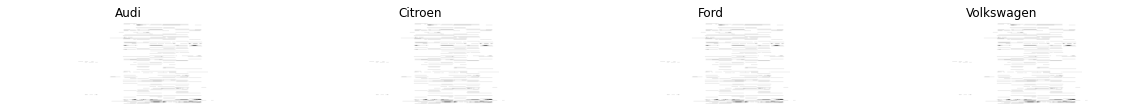

In [12]:
import matplotlib.pyplot as plt

images, labels = training_generator.next()

fig, axes = plt.subplots(1, 4, figsize=(20,20))

axes = axes.flatten()
axes_idx = 0

for one_hot_label in range(4):
    for image, label in zip(images, labels):
        if label[one_hot_label] == 1:
            ax = axes[axes_idx]
            ax.imshow(images[:,:,0], cmap='Greys_r')
            ax.axis('off')
            ax.set_title(classes[one_hot_label])
            axes_idx += 1
            break


plt.show()

In [13]:
first_image_in_batch = images[0]

In [14]:
image_shape = first_image_in_batch.shape

print(image_shape)

(300, 300, 1)


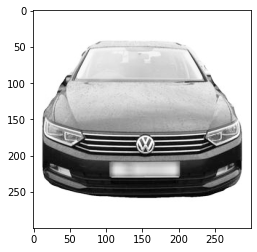

In [15]:
plt.imshow(first_image_in_batch[:,:,0], cmap='Greys_r')

In [16]:
print(first_image_in_batch[:,:,0])

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [17]:
from keras.layers import Conv2D

In [18]:
convolutional_layer = Conv2D(16, (7, 7), activation='relu', input_shape=image_shape)
convolutional_layer_2 = Conv2D(20, (12, 12), activation='relu', input_shape=image_shape)

In [19]:
from keras.layers import MaxPool2D

max_pool_layer = MaxPool2D()
max_pool_layer_2 = MaxPool2D()

In [20]:
from keras.layers import Flatten

flatten_layer = Flatten()

In [21]:
from keras.layers import Dense

dense_layer = Dense(4, activation='softmax')

In [22]:
from keras.models import Sequential

cnn_model = Sequential([
    convolutional_layer,
    max_pool_layer,
    convolutional_layer_2,
    max_pool_layer_2,
    flatten_layer,
    dense_layer
])

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 294, 294, 16)      800       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 136, 136, 20)      46100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 68, 68, 20)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 92480)             0         
                                                                 
 dense (Dense)               (None, 4)                 3

In [18]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
gpus

[]

In [23]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history = cnn_model.fit(training_generator, epochs=5)

Epoch 1/5
10/10 [==============================] - 46s 5s/step - loss: 1.7895 - accuracy: 0.3187
Epoch 2/5
10/10 [==============================] - 45s 4s/step - loss: 1.2087 - accuracy: 0.4833
Epoch 3/5
10/10 [==============================] - 45s 4s/step - loss: 0.8477 - accuracy: 0.6927
Epoch 4/5
10/10 [==============================] - 44s 4s/step - loss: 0.5569 - accuracy: 0.8115
Epoch 5/5
10/10 [==============================] - 44s 4s/step - loss: 0.3648 - accuracy: 0.8917


In [24]:
val_loss, val_acc = cnn_model.evaluate(validations_generator)

print(f"Evaluation result on Test Data : Loss = {val_loss}, accuracy = {val_acc}")

3/3 [==============================] - 1s 336ms/step - loss: 0.7327 - accuracy: 0.7250
Evaluation result on Test Data : Loss = 0.7327384352684021, accuracy = 0.7250000238418579


In [26]:
import cv2

(300, 300)


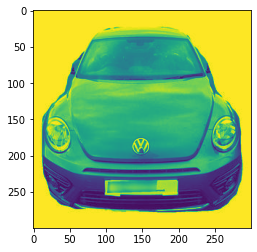

In [36]:
image=cv2.imread("D:\PycharmProject\CarClassifier\Datasets\Voitures\Volkswagen\Volkswagen$$Beetle$$2017$$Grey$$95_3$$798$$image_7.jpg", cv2.IMREAD_GRAYSCALE)
print(image.shape)
plt.imshow(image)

In [37]:
cnn_model.predict(image.reshape(1,300,300))

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 4.327217e-36]],
      dtype=float32)

In [24]:
training_generator.class_indices

{'Audi': 0, 'Citroen': 1, 'Ford': 2, 'Volkswagen': 3}